In [4]:
# install.packages("ggplot2")
# install.packages("dplyr")

In [6]:
library(ggplot2)
library(dplyr)

In [7]:
beav <- beaver1 # загрузим базу - она встроена в R
beav$id <- 1:nrow(beaver1) # добавим id

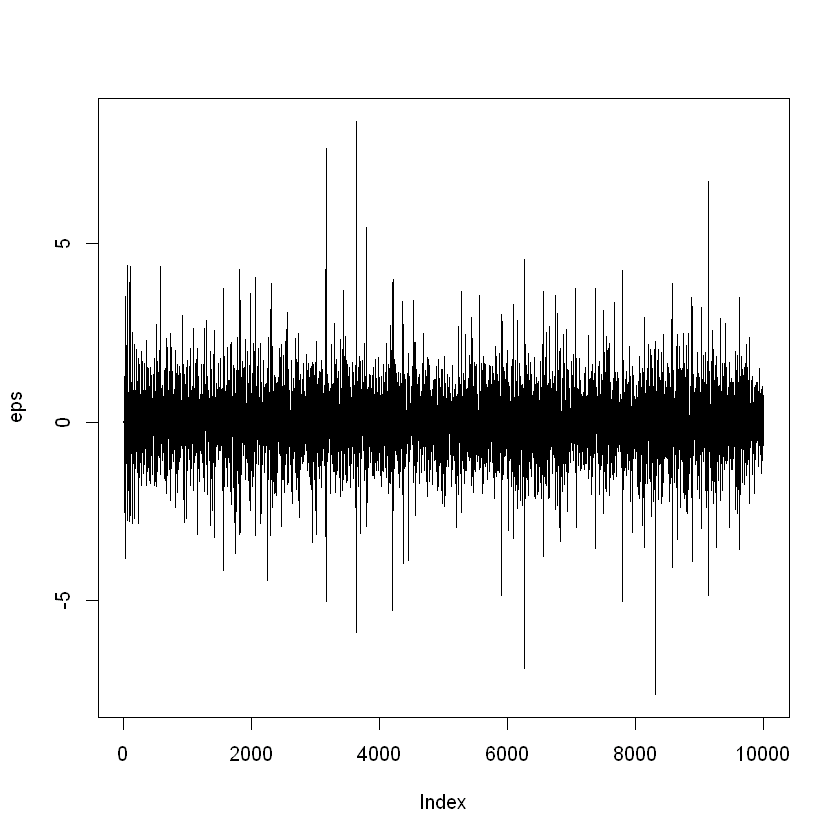

In [1]:
set.seed(2)
 # параметры модели 
a0 <- 0.2
 a1 <- 0.5
 b1 <- 0.3
 w <- rnorm(10000) ## белый шум
 eps <- rep(0, 10000) ## исходный ряд, пока заполненный нулями 
sigsq <- rep(0, 10000) ## компонента GARCH
 for (i in 2:10000) {
 sigsq[i] <- a0 + a1 * (eps[i-1]^2) + b1 * sigsq[i-1]
 eps[i] <- w[i]*sqrt(sigsq[i])
 }
 plot(eps, type = 'l')

In [2]:
library(tseries)
 eps.garch <- garch(eps, trace=FALSE)
 summary(eps.garch)

ERROR: Error in library(tseries): нет пакета под названием 'tseries'
